# 0909

과대적합 방지: 학습 파라미터 줄이기

모델 성능 높이기 : 레이어 측면 - 추가-개선을 위해서 네트워크를 개선해야 함

데이터 측면: 더 좋은 데이터를 더 많이 사용

SpatialDropout2D: 2D 공간에서 특정 뉴런을 무작위로 드롭아웃합니다.
ReduceLROnPlateau: 학습 성능이 개선되지 않을 경우 학습률을 동적으로 감소시킵니다.
ImageDataGenerator: 이미지 데이터를 실시간으로 증강(augmentation)시키는 클래스입니다. 데이터 양을 늘리고 과적합을 방지하기 위해 이미지 회전, 확대, 축소 등의 변환을 수행할 수 있습니다.

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    BatchNormalization,
    Dropout,
    Input,
    Conv2D,
    MaxPooling2D,
    SpatialDropout2D,
    Flatten,
    Reshape,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Add a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Normalize the images to a pixel value between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = [
    "T-Shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
]

In [ ]:
def build_model():
    input = Input(shape=(28, 28, 1))
    output = Conv2D(32, (3, 3), activation="relu")(input) # 커널수:32, 3x3 필터, 활성화 함수 relu
    output = Conv2D(64, (3, 3), activation="relu")(output)
    output = Conv2D(64, (3, 3), activation="relu")(output)
    output = Flatten()(output)
    output = Dense(128, activation="relu")(output) #출력 뉴런수:128, 활성화 함수 relu
    output = Dense(64, activation="relu")(output)
    output = Dense(10, activation="softmax")(output) # 10개의 클래스, 활성화 함수 softmax, 가장 높은 확률로 분류

    model = Model(inputs=[input], outputs=output)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["acc"],  # parse_categorical_crossentropy: 클래스가 정수일때 사용
    )

    return model


model_1 = build_model()
model_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 22, 22, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,029,706 (15.37 MB)

 Trainable params: 4,029,706 (15.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
)

hist_1 = model_1.fit(
    x_train, y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    callbacks=[model_checkpoint, early_stopping],
)

Epoch 1/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.7588 - loss: 0.6778
Epoch 1: val_loss improved from inf to 0.35795, saving model to best_model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - acc: 0.7590 - loss: 0.6771 - val_acc: 0.8682 - val_loss: 0.3580
Epoch 2/40
327/329 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.8925 - loss: 0.2888
Epoch 2: val_loss improved from 0.35795 to 0.27810, saving model to best_model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - acc: 0.8926 - loss: 0.2887 - val_acc: 0.8996 - val_loss: 0.2781
Epoch 3/40
326/329 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.9163 - loss: 0.2286
Epoch 3: val_loss improved from 0.27810 to 0.26605, saving model to best_model.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - acc: 0.9163 - loss: 0.2285 - val_acc: 0.9057 - val_loss: 0.2661
Epoch 4/40
327/329 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.9360 - loss: 0.1743
Epoch 4: val_loss improved from 0.26605 to 0.25150, saving model to best_model.keras
329/329 ━━

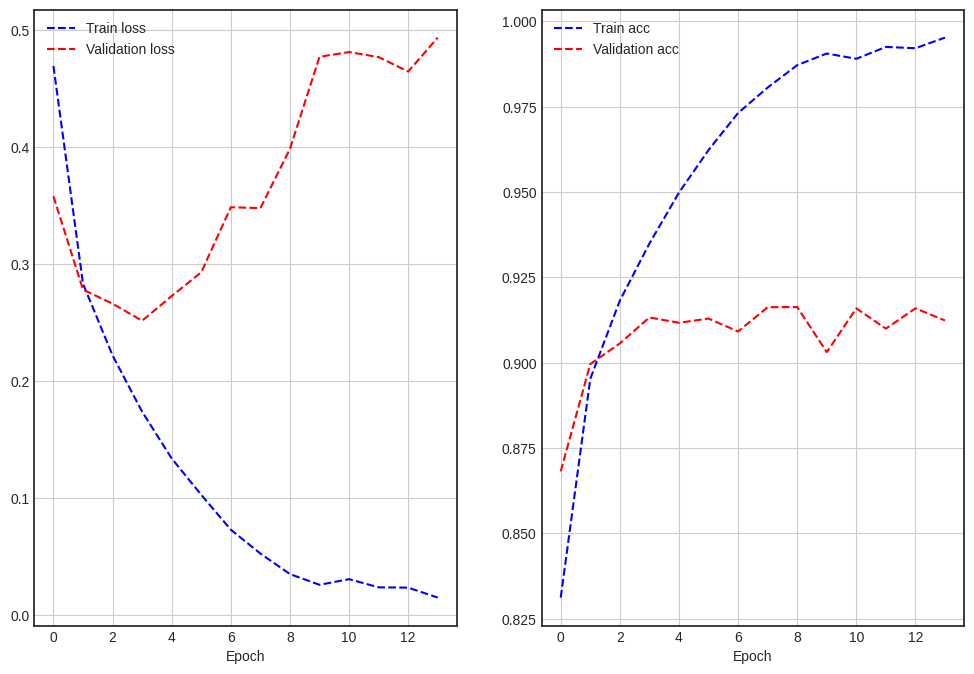

In [ ]:
hist_1.history.keys()
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'],'b--', label='Train loss')
plt.plot(hist_1.history['val_loss'],'r--', label='Validation loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'],'b--', label='Train acc')
plt.plot(hist_1.history['val_acc'],'r--', label='Validation acc')
plt.xlabel('Epoch')
plt.grid()
plt.legend()


In [ ]:
model_1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.8997 - loss: 0.5551


[0.5083646774291992, 0.9057999849319458]

### 모델 구성 및 학습: 과대적합 방지

- 학습 파라미터의 수 비교
  - 모델 1은 더 많은 Conv2D 레이어를 포함하고 있으며, MaxPooling2D 및 Dropout 레이어가 없으므로 학습할 파라미터가 더 많습니다.
  - 모델 2는 Conv2D 레이어 후 MaxPooling2D와 Dropout 레이어를 추가하여 파라미터 수를 줄이는 동시에, 과적합을 방지하는 데 더 신경 쓴 모델입니다.

In [ ]:
def build_model2():
    input = Input(shape=(28, 28, 1))
    output = Conv2D(32, (3, 3), activation="relu")(
        input
    )  # 커널수:32, 3x3 필터, 활성화 함수 relu
    output = MaxPooling2D(strides=(2, 2))(output)
    output = Conv2D(64, (3, 3), activation="relu")(output)
    output = Dropout(0.4)(output)
    output = MaxPooling2D(strides=(2, 2))(output)
    output = Conv2D(64, (3, 3), activation="relu")(output)
    output = Dropout(0.4)(output)
    output = MaxPooling2D(strides=(2, 2))(output)
    output = Flatten()(output)
    output = Dense(128, activation="relu")(output)  # 출력 뉴런수:128, 활성화 함수 relu
    output = Dense(64, activation="relu")(output)
    output = Dense(10, activation="softmax")(
        output
    )  # 10개의 클래스, 활성화 함수 softmax, 가장 높은 확률로 분류

    model = Model(inputs=[input], outputs=output)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["acc"],  # parse_categorical_crossentropy: 클래스가 정수일때 사용
    )

    return model

model_2 = build_model2()
model_2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,970 (285.04 KB)

 Trainable params: 72,970 (285.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Callbacks
model_checkpoint = ModelCheckpoint(
    "best_model2.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
)

hist_2 = model_2.fit(
    x_train,
    y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    callbacks=[model_checkpoint, early_stopping],
)

Epoch 1/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.5704 - loss: 1.1547
Epoch 1: val_loss improved from inf to 0.79011, saving model to best_model2.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - acc: 0.5707 - loss: 1.1537 - val_acc: 0.7675 - val_loss: 0.7901
Epoch 2/40
316/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7742 - loss: 0.6031
Epoch 2: val_loss improved from 0.79011 to 0.67175, saving model to best_model2.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - acc: 0.7746 - loss: 0.6024 - val_acc: 0.8068 - val_loss: 0.6717
Epoch 3/40
321/329 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8069 - loss: 0.5387
Epoch 3: val_loss improved from 0.67175 to 0.60786, saving model to best_model2.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.8068 - loss: 0.5384 - val_acc: 0.8198 - val_loss: 0.6079
Epoch 4/40
317/329 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8196 - loss: 0.4934
Epoch 4: val_loss improved from 0.60786 to 0.54727, saving model to best_model2.keras
329/329 ━━━

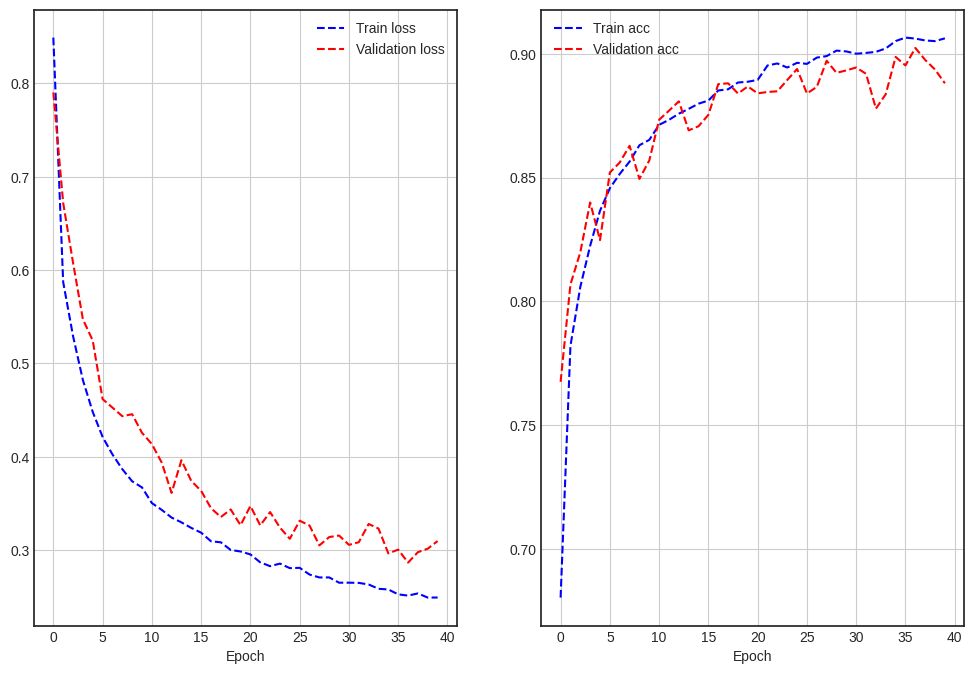

In [ ]:
hist_2.history.keys()
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(hist_2.history["loss"], "b--", label="Train loss")
plt.plot(hist_2.history["val_loss"], "r--", label="Validation loss")
plt.xlabel("Epoch")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history["acc"], "b--", label="Train acc")
plt.plot(hist_2.history["val_acc"], "r--", label="Validation acc")
plt.xlabel("Epoch")
plt.grid()
plt.legend()

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.8805 - loss: 0.3277


[0.32258617877960205, 0.8805999755859375]

과대적합이 개선됨을 확인할 수 있습니다.

에포크는 40 이상해도 괜찮을 것 같음



### 모델 성능 높이기: 레이어 추가

padding='same'과 'valid'옵션을 코드 내에서 별도로 설정하는 이유
- 모델 설계자가 네트워크의 각 계층에서 출력의 크기와 특성 추출 방식을 세밀하게 제어하고자 하는 것이다.
- 아래 경우에는 초기에는 공간 차원을 유지하면서 입력 데이터의 전반적인 특성을 포착하고 네트워크가 깊어질 수록 더 추상화된 특성을 추출하려는 목적으로 생각해 볼 수 있음.
- same 옵션은 입력과 출력의 크기가 동일하도록 출력의 크기를 조정하고, valid 옵션은 출력의 크기를 입력의 크기보다 작게 만들어 특성을 추출하는 방식으로 생각할 수 있음.

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    BatchNormalization,
    Dropout,
    Input,
    Conv2D,
    MaxPooling2D,
    SpatialDropout2D,
    Flatten,
    Reshape,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Add a channel dimension
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Normalize the images to a pixel value between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

class_names = [
    "T-Shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle Boot",
]

def build_model3():
    input = Input(shape=(28, 28, 1))
    output = Conv2D(32, (3, 3), activation="relu", padding='same')(
        input
    )  # 커널수:32, 3x3 필터, 활성화 함수 relu
    output = BatchNormalization()(output)
    output = Conv2D(64, (3, 3), activation="relu", padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPooling2D(strides=(2, 2))(output)

    output = Conv2D(64, (3, 3), activation="relu", padding='same')(output)
    output = BatchNormalization()(output)
    output = Conv2D(128, (3, 3), activation="relu", padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPooling2D(strides=(2, 2))(output)

    output = Conv2D(256, (3, 3), activation="relu", padding='same')(output)
    output = BatchNormalization()(output)
    output = Conv2D(256, (3, 3), activation="relu", padding='valid')(output)
    output = Dropout(0.5)(output)
    output = MaxPooling2D(strides=(2, 2))(output)

    output = Flatten()(output)
    output = Dense(512, activation="relu")(output)  # 출력 뉴런수:512, 활성화 함수 relu
    output = Dropout(0.5)(output)
    output = Dense(256, activation="relu")(output)
    output = Dropout(0.5)(output)
    output = Dense(10, activation="softmax")(
        output
    )  # 10개의 클래스, 활성화 함수 softmax, 가장 높은 확률로 분류

    model = Model(inputs=[input], outputs=output)

    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["acc"],  # parse_categorical_crossentropy: 클래스가 정수일때 사용
    )

    return model


model_3 = build_model3()
model_3.summary()

# Callbacks
model_checkpoint = ModelCheckpoint(
    "best_model3.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
)

hist_3 = model_3.fit(
    x_train,
    y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    callbacks=[model_checkpoint, early_stopping],
)



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 1,281,738 (4.89 MB)

 Trainable params: 1,281,034 (4.89 MB)

 Non-trainable params: 704 (2.75 KB)

Epoch 1/40
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.6068 - loss: 1.1619
Epoch 1: val_loss improved from inf to 2.64667, saving model to best_model3.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - acc: 0.6072 - loss: 1.1608 - val_acc: 0.0983 - val_loss: 2.6467
Epoch 2/40
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8223 - loss: 0.4906
Epoch 2: val_loss improved from 2.64667 to 1.14641, saving model to best_model3.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - acc: 0.8224 - loss: 0.4904 - val_acc: 0.7172 - val_loss: 1.1464
Epoch 3/40
327/329 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8653 - loss: 0.3910
Epoch 3: val_loss improved from 1.14641 to 0.77610, saving model to best_model3.keras
329/329 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.8653 - loss: 0.3909 - val_acc: 0.8132 - val_loss: 0.7761
Epoch 4/40
326/329 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8815 - loss: 0.3410
Epoch 4: val_loss improved from 0.77610 to 0.62434, saving model to best_model3.keras
329/32

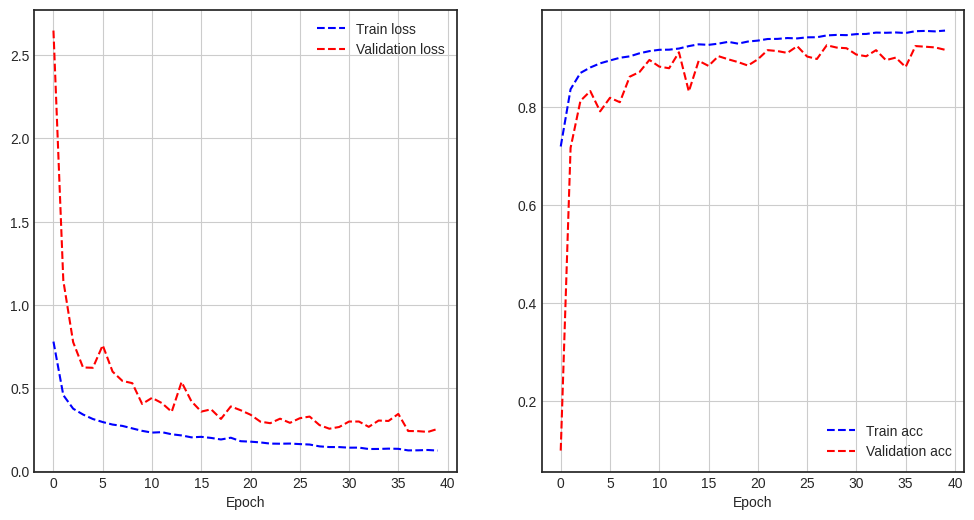

In [ ]:
hist_3.history.keys()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_3.history["loss"], "b--", label="Train loss")
plt.plot(hist_3.history["val_loss"], "r--", label="Validation loss")
plt.xlabel("Epoch")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history["acc"], "b--", label="Train acc")
plt.plot(hist_3.history["val_acc"], "r--", label="Validation acc")
plt.xlabel("Epoch")
plt.grid()
plt.legend()

In [ ]:
model_3.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9110 - loss: 0.2691


[0.2685818672180176, 0.909500002861023]

과대적합도 막고, 성능도 좋아짐

파라미터는 줄이고 풀링이나 드랍아웃을 적절히 사용

### CNN(Convolutional Neural Network)에서 파라미터 수의 증가 요소

- 필터(커널)의 수: CNN의 각 합성곱 계층(Convolutional layer)은 여러 필터(또는 커널)를 사용하여 입력 이미지에서 특징을 추출합니다. 필터의 수가 많아질수록 더 많은 특징을 동시에 학습할 수 있지만, 이는 동시에 해당 계층의 파라미터 수를 증가시킵니다.

- 필터의 크기: 필터의 크기가 클수록 한 번에 더 넓은 영역의 정보를 처리할 수 있습니다. 그러나 필터 크기의 증가는 필터 내의 가중치 수를 증가시켜, 결과적으로 해당 계층의 전체 파라미터 수를 증가시킵니다.

- 완전연결계층(Fully Connected layers)의 크기: CNN의 끝부분에서 주로 사용되는 전결합 계층은 모든 입력을 각 출력 뉴런에 연결합니다. 이 계층의 뉴런(유닛) 수가 많을수록 모델의 파라미터 수가 크게 증가합니다. 전결합 계층은 일반적으로 모델 내에서 가장 많은 파라미터를 가집니다.

- 계층의 깊이: CNN의 계층(레이어) 수가 많아질수록, 즉 모델이 더 깊어질수록, 모델이 더 복잡한 특징을 학습할 수 있게 되지만, 이는 또한 전체 파라미터 수를 증가시킵니다.

- 특성 맵(Feature Map)의 크기: 특정 합성곱 계층이 출력하는 특성 맵의 크기가 크면 클수록, 그 다음 계층(특히 전결합 계층이나 합성곱 계층)의 파라미터 수가 증가할 수 있습니다. 특성 맵의 크기는 입력 이미지의 크기와 필터의 크기, 스트라이드(stride), 패딩(padding)에 의해 결정됩니다.

이러한 요소들은 모두 모델의 학습 능력과 일반화 능력에 영향을 미칩니다. 파라미터 수가 많은 모델은 더 복잡한 특징을 학습할 수 있지만, 과적합(overfitting)의 위험도 높아질 수 있습니다. 반면, 파라미터 수가 적은 모델은 계산 효율성은 높지만, 모델의 표현 능력이 제한될 수 있습니다. 따라서 모델 설계 시 이러한 점을 고려하여 적절한 균형을 찾는 것이 중요합니다.

### 모델 성능 높이기: 이미지 증강(Image Augmentation)
데이터 증강은 기존의 훈련 데이터를 다양하게 변형하여 모델의 일반화 능력을 향상시키는 기법입니다. 각 파라미터는 특정 방식으로 이미지를 변형합니다.

ImageDataGenerator 파라미터 설명:
- rotation_range=10: 이미지를 -10도에서 10도 사이로 무작위로 회전합니다.
- zoom_range=0.2: 이미지를 80%에서 120% 사이로 무작위로 확대/축소합니다.
- shear_range=0.6: 이미지를 반시계 방향으로 0.6 라디안 내에서 기울입니다.
- width_shift_range=0.1와 height_shift_range=0.1: 각각 이미지를 수평과 수직으로 최대 10% 내에서 무작위로 이동합니다.
- horizontal_flip=True: 수평 방향으로 이미지를 무작위로 뒤집습니다. (예: 좌우 반전)
- vertical_flip=False: 수직 방향으로 이미지를 뒤집지 않습니다.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
)

augment_size = 200
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


(200, 28, 28, 1)


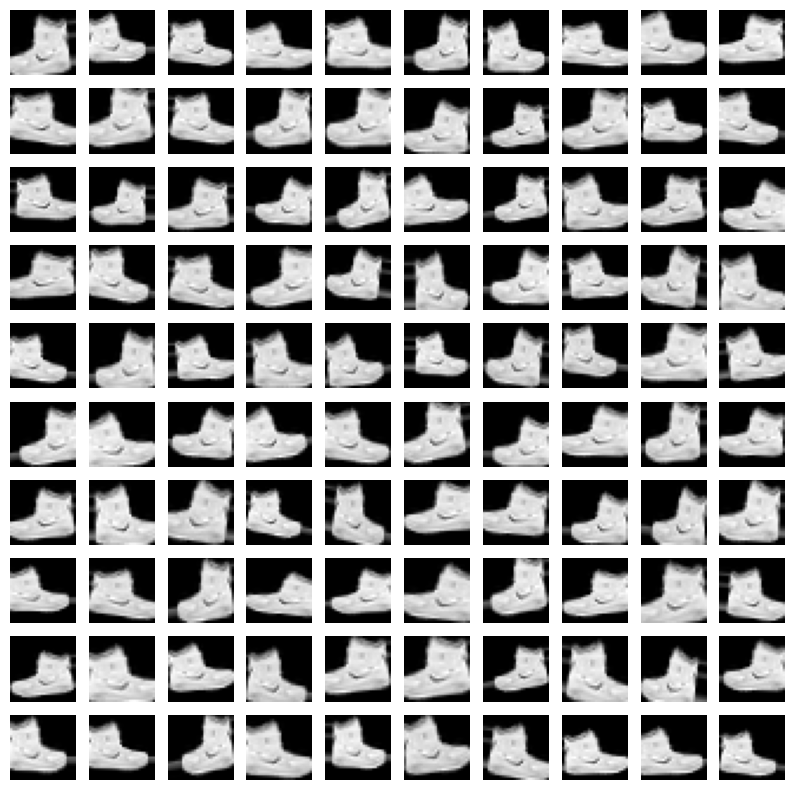

In [ ]:
#flow() 함수는 이미지 데이터를 증식시키는 함수
# np.tile() 함수는 이미지 데이터를 복사하는 함수
# np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1)은 x_train[0]을 augment_size만큼 복사하여 증강된 이미지 데이터 형태로 만든다.
# np.zeros(augment_size)는 0으로 채워진 배열을 만든다. 증강된 이미지 데이터의 레이블을 0으로 설정한다.
# batch_size=augment_size는 한번에 생성할 증강된 이미지의 수를 지정
# next()[0]은 생성된 이미지 배치 중 첫번째 배치(증강된 이미지 데이터)에 접근
# 이미지 증강

x_augment_iterator = image_generator.flow(
    np.repeat(x_train[0].reshape(1, 28, 28, 1), augment_size, axis=0),  #이미지 데이터를 복사하여 증식
    np.zeros(augment_size), #라벨은 필요하지 않으므로 0으로 설정
    batch_size=augment_size,
    shuffle=False,
)

# next() 함수를 사용하여 생성된 이미지 데이터를 가져온다.
# [0]: flow() 로 반환된 데이터는 (이미지 데이터, 라벨 데이터) 형식으로 반환되기 때문에 [0]을 사용하여 이미지 데이터만 가져온다.
x_augment = next(x_augment_iterator)[0]

print(x_augment.shape)

plt.figure(figsize=(10, 10))
for i in range(1,101):
    plt.subplot(10, 10, i)
    plt.axis('off')
    plt.imshow(x_augment[i-1].reshape(28, 28), cmap='gray')


In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
)

augment_size = 30000
random_mask = np.random.randint(x_train.shape[0], size=augment_size)  # x_train.shape[0]개 중에서 augment_size만큼 랜덤하게 선택
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

# 증강할 이미지 데이터 생성
x_augmented = image_generator.flow(x_augmented,  # 증식하는게 아니라 배치별로 이미지가 랜덤하게 변형
                                   np.zeros(augment_size),
                                   batch_size=augment_size,
                                   shuffle=False
                                   )
x_augmented = next(x_augmented)[0]
print(x_augmented.shape)


(30000, 28, 28, 1)


3만개 만들고 기존 6만개에 추가할 예정

In [ ]:
x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(90000,)


In [ ]:
model_4 = build_model3()
model_4.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,3

 Total params: 1,281,738 (4.89 MB)

 Trainable params: 1,281,034 (4.89 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# Callbacks
model_checkpoint = ModelCheckpoint(
    "best_model4.keras",
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
)

early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=1,
)

hist_4 = model_4.fit(
    x_train,
    y_train,
    epochs=40,
    validation_split=0.3,
    batch_size=128,
    callbacks=[model_checkpoint, early_stopping],
)

Epoch 1/40
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.6457 - loss: 1.0302
Epoch 1: val_loss improved from inf to 2.16196, saving model to best_model4.keras
493/493 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - acc: 0.6459 - loss: 1.0295 - val_acc: 0.2600 - val_loss: 2.1620
Epoch 2/40
492/493 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8449 - loss: 0.4457
Epoch 2: val_loss improved from 2.16196 to 1.33235, saving model to best_model4.keras
493/493 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - acc: 0.8449 - loss: 0.4455 - val_acc: 0.5533 - val_loss: 1.3323
Epoch 3/40
492/493 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8733 - loss: 0.3671
Epoch 3: val_loss improved from 1.33235 to 1.32518, saving model to best_model4.keras
493/493 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - acc: 0.8733 - loss: 0.3671 - val_acc: 0.6224 - val_loss: 1.3252
Epoch 4/40
492/493 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.8855 - loss: 0.3351
Epoch 4: val_loss improved from 1.32518 to 1.17557, saving model to best_model4.keras
493/49

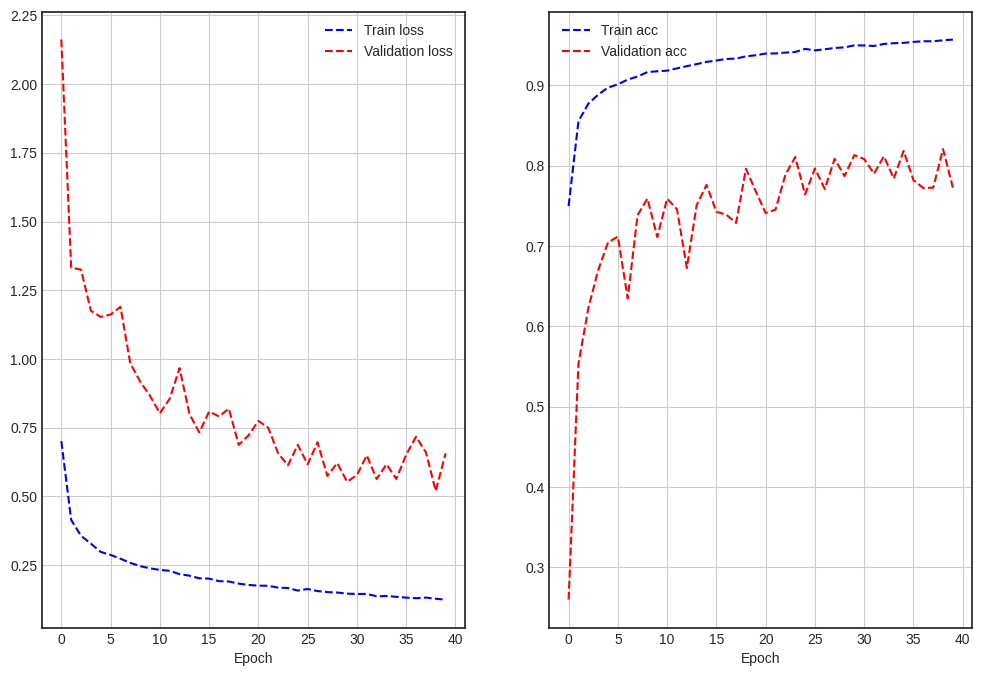

In [ ]:
hist_4.history.keys()
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(hist_4.history["loss"], "b--", label="Train loss")
plt.plot(hist_4.history["val_loss"], "r--", label="Validation loss")
plt.xlabel("Epoch")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history["acc"], "b--", label="Train acc")
plt.plot(hist_4.history["val_acc"], "r--", label="Validation acc")
plt.xlabel("Epoch")
plt.grid()
plt.legend()

모델 3 평가

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9110 - loss: 0.2691

[0.2685818672180176, 0.909500002861023]

In [ ]:
model_4.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9143 - loss: 0.2601


[0.26066356897354126, 0.9157000184059143]

정확도는 약간 올라가고 손실도 약간 줄어듬

데이터 증식이 영향을 미치는 것을 알 수 있다.

데이터 증식이 노하우

챗지피티로 데이터 증식도 많이 한다고 함

모델을 만들기 위한 데이터 증식

교육분야에도 적용될게 많음

양질의 데이터를 만들수 있는 노하우

특정 도메인 분야라도 양질의 데이터를 만들어야 함

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rodneykim","key":"864372c8d1d22e59231f822167390d90"}'}

In [8]:
!ls

drive  kaggle.json  sample_data


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Sep 10 00:25 .
drwx------ 1 root root 4096 Sep 10 00:25 ..
-rw------- 1 root root   65 Sep 10 00:25 kaggle.json


In [9]:
!pip install --upgrade kaggle

In [10]:
!kaggle --version


Kaggle API 1.6.17


In [11]:
!pip show kaggle

Name: kaggle
Version: 1.6.17
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [12]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats
License(s): DbCL-1.0
 99% 805M/817M [00:09<00:00, 129MB/s]
100% 817M/817M [00:09<00:00, 90.0MB/s]


In [13]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data


In [15]:
!unzip -qq dogs-vs-cats.zip

In [16]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [17]:
!mv train train1
!mv test test1

In [18]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test1  train1


In [19]:
!mv /content/train1/train /content/
!mv /content/test1/test /content/

In [20]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  test1	train  train1


In [21]:
!rm -rf train1
!rm -rf test1

In [22]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [23]:
!ls train/

cat.0.jpg      cat.1966.jpg  cat.5180.jpg  cat.8396.jpg   dog.1160.jpg	 dog.3575.jpg  dog.6790.jpg
cat.10000.jpg  cat.1967.jpg  cat.5181.jpg  cat.8397.jpg   dog.11610.jpg  dog.3576.jpg  dog.6791.jpg
cat.10001.jpg  cat.1968.jpg  cat.5182.jpg  cat.8398.jpg   dog.11611.jpg  dog.3577.jpg  dog.6792.jpg
cat.10002.jpg  cat.1969.jpg  cat.5183.jpg  cat.8399.jpg   dog.11612.jpg  dog.3578.jpg  dog.6793.jpg
cat.10003.jpg  cat.196.jpg   cat.5184.jpg  cat.839.jpg	  dog.11613.jpg  dog.3579.jpg  dog.6794.jpg
cat.10004.jpg  cat.1970.jpg  cat.5185.jpg  cat.83.jpg	  dog.11614.jpg  dog.357.jpg   dog.6795.jpg
cat.10005.jpg  cat.1971.jpg  cat.5186.jpg  cat.8400.jpg   dog.11615.jpg  dog.3580.jpg  dog.6796.jpg
cat.10006.jpg  cat.1972.jpg  cat.5187.jpg  cat.8401.jpg   dog.11616.jpg  dog.3581.jpg  dog.6797.jpg
cat.10007.jpg  cat.1973.jpg  cat.5188.jpg  cat.8402.jpg   dog.11617.jpg  dog.3582.jpg  dog.6798.jpg
cat.10008.jpg  cat.1974.jpg  cat.5189.jpg  cat.8403.jpg   dog.11618.jpg  dog.3583.jpg  dog.6799.jpg
cat.

In [4]:
import os, shutil, pathlib

original_dir = pathlib.Path(r"train")
new_base_dir = pathlib.Path(r'cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            src = original_dir / fname
            dst = dir / fname
            shutil.copyfile(src, dst)

make_subset('train', 0, 1000)
make_subset('validation', 1000, 1500)
make_subset('test', 1500, 2500)

FileExistsError: [Errno 17] File exists: 'cats_vs_dogs_small/train/cat'

In [25]:
!ls

cats_vs_dogs_small  dogs-vs-cats.zip  drive  kaggle.json  sample_data  test  train


In [26]:
!ls /content/cats_vs_dogs_small/

test  train  validation


강아지, 고양이 분류를 위한 소규모 컨브넷 만들기

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [6]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [8]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
]


history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=callbacks
)


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.5194 - loss: 0.6989 - val_accuracy: 0.6140 - val_loss: 0.6879
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.5610 - loss: 0.6984 - val_accuracy: 0.5560 - val_loss: 0.6781
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.6044 - loss: 0.6541 - val_accuracy: 0.6640 - val_loss: 0.6232
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.6619 - loss: 0.6039 - val_accuracy: 0.6350 - val_loss: 0.7145
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6881 - loss: 0.5928 - val_accuracy: 0.6580 - val_loss: 0.6095
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.6967 - loss: 0.5670 - val_accuracy: 0.6460 - val_loss: 0.7178
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.7135 - loss: 0.5473 - val_accuracy: 0.6980 - val_loss: 0.6221
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.7367 - loss: 0.5391 - val_accuracy: 0.663

In [35]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기: ",data_batch.shape)
    print("레이블 배치 크기: ",labels_batch.shape)
    break

데이터 배치 크기:  (32, 180, 180, 3)
레이블 배치 크기:  (32,)


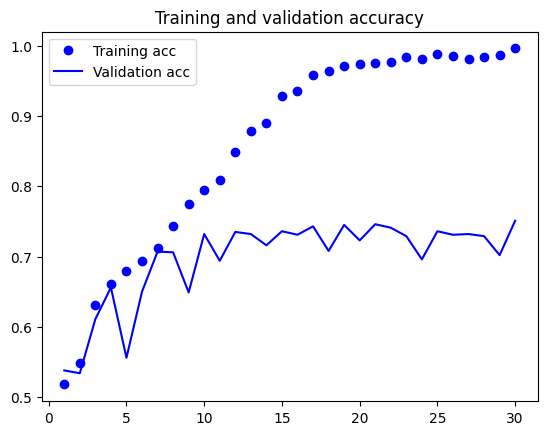

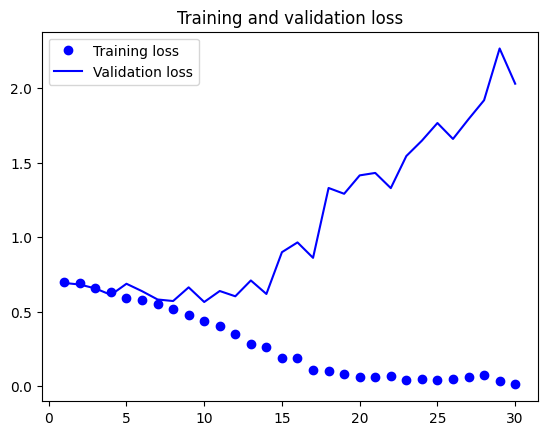

In [36]:
import matplotlib.pyplot as plt
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

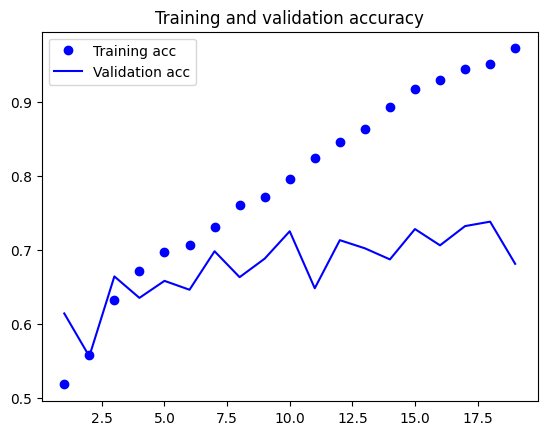

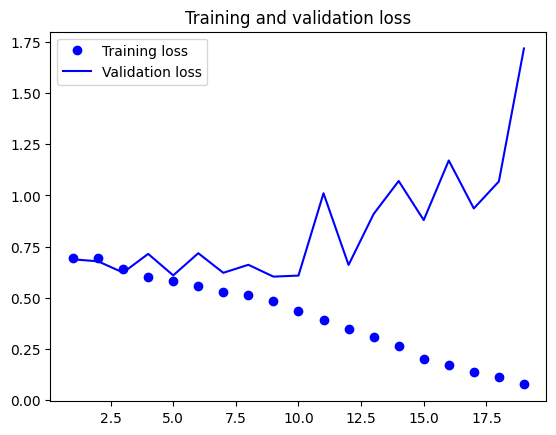

In [10]:
import matplotlib.pyplot as plt
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
!ls

cats_vs_dogs_small	    dogs-vs-cats.zip  kaggle.json  test
convnet_from_scratch.keras  drive	      sample_data  train


In [12]:
test_model = tf.keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.7094 - loss: 0.6120
Test accuracy: 0.6965000033378601


**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

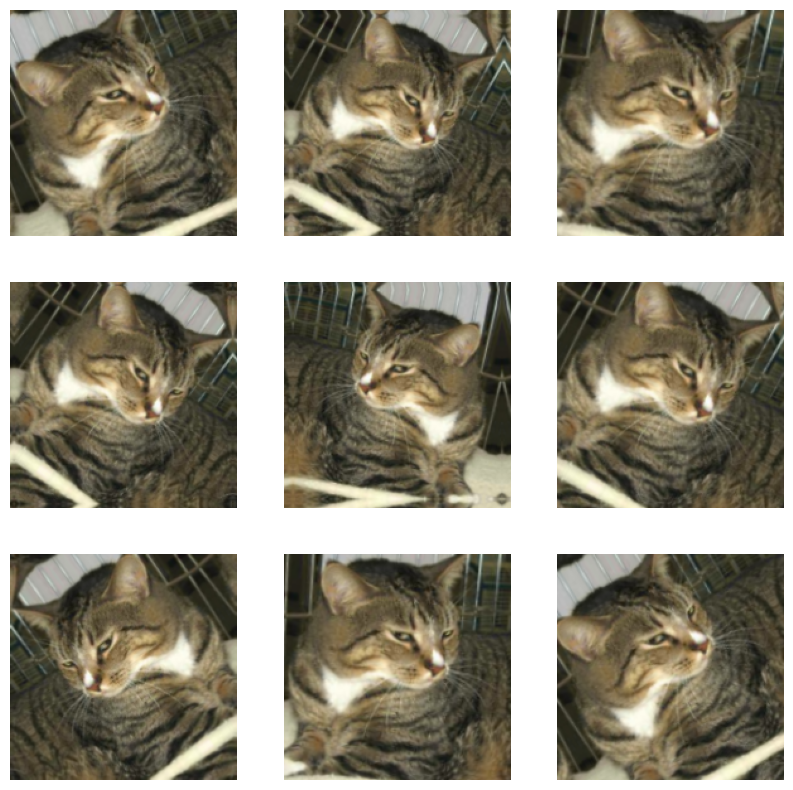

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [17]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss"
    ),
]


history = model.fit(
    train_dataset, validation_data=validation_dataset, epochs=100, callbacks=callbacks
)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - accuracy: 0.5020 - loss: 0.6997 - val_accuracy: 0.5120 - val_loss: 0.6921
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - accuracy: 0.5167 - loss: 0.6937 - val_accuracy: 0.5850 - val_loss: 0.6850
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.5773 - loss: 0.6904 - val_accuracy: 0.6260 - val_loss: 0.6652
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.5762 - loss: 0.6780 - val_accuracy: 0.6220 - val_loss: 0.6528
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.6232 - loss: 0.6478 - val_accuracy: 0.6080 - val_loss: 0.6299
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6115 - loss: 0.6447 - val_accuracy: 0.5480 - val_loss: 0.7036
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.6341 - loss: 0.6313 - val_accuracy: 0.5080 - val_loss: 1.5050
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - accuracy: 0.6622 - loss: 0.6713 - val_accurac

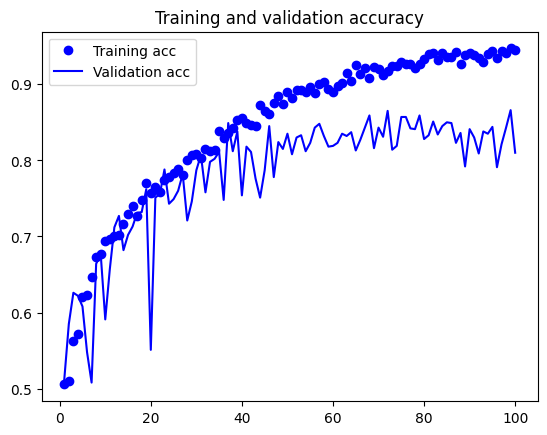

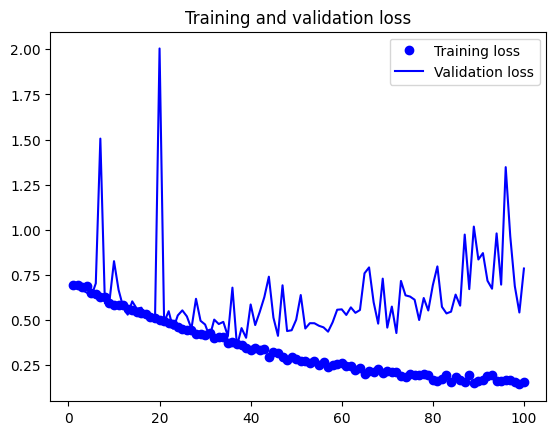

In [19]:
import matplotlib.pyplot as plt
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
test_model = tf.keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8150 - loss: 0.4401
Test accuracy: 0.8109999895095825


In [23]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

### 사전 훈련된 모델 활용하기

#### 사전 훈련된 모델을 사용한 특성 추출


vgg16 합성곱 기반 층 만들기

ImageNet 데이터셋

- ImageNet은 컴퓨터 비전 분야에서 매우 유명한 대규모 데이터셋입니다.
- 이 데이터셋은 1,000개의 클래스로 구성되어 있으며, 각 클래스에는 다양한 객체가 포함되어 있습니다. 예를 들어, 동물, 식물, 사물 등의 카테고리가 있습니다.
- 1,400만 개 이상의 이미지로 이루어져 있으며, 각 이미지에는 하나 이상의 객체에 대한 레이블이 붙어 있습니다.
- VGG16 모델은 **ILSVRC (ImageNet Large Scale Visual Recognition Challenge)**에서 사용된 1000개의 클래스에 대한 데이터를 사용해 훈련되었습니다. 이 챌린지는 이미지 분류, 객체 탐지 등의 다양한 비전 작업을 위한 벤치마크입니다.

In [29]:
import tensorflow as tf
from tensorflow.keras import layers
vgg16 =  tf.keras.applications.vgg16.VGG16(
    weights='imagenet', input_shape=(224, 224, 3)
)
vgg16.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

소프트맥스로 나갈때 1000개 클래스 분류

공간을 인식하는 컨브넷은 유용


In [24]:
import tensorflow as tf
from tensorflow.keras import layers
conv_base =  tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet', input_shape=(180, 180, 3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)
        features = conv_base(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [27]:
train_features.shape

(2000, 5, 5, 512)

In [28]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras", save_best_only=True, monitor="val_loss"
    ),
]

history = model.fit(
    train_features, train_labels,
    validation_data=(val_features, val_labels),
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.8757 - loss: 18.2423 - val_accuracy: 0.9710 - val_loss: 0.5167
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9784 - loss: 0.3035 - val_accuracy: 0.9700 - val_loss: 0.3924
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9851 - loss: 0.1598 - val_accuracy: 0.9540 - val_loss: 0.9901
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9851 - loss: 0.2475 - val_accuracy: 0.9690 - val_loss: 0.5078
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9978 - loss: 0.0162 - val_accuracy: 0.9740 - val_loss: 0.7663
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9897 - loss: 0.1517 - val_accuracy: 0.9780 - val_loss: 0.7058
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9942 - loss: 0.0933 - val_accuracy: 0.9790 - val_loss: 0.6690
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 7.1887e-08 - val_accuracy: 0.9790 - va

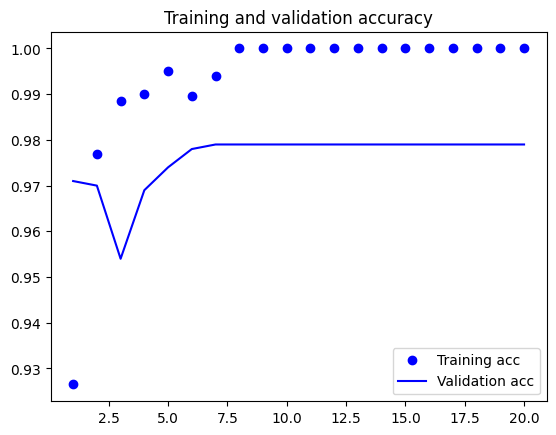

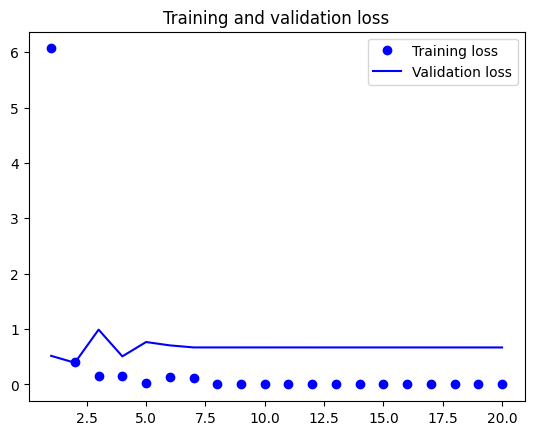

In [30]:
import matplotlib.pyplot as plt
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
test_model = tf.keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9695 - loss: 0.3746
Test accuracy: 0.9710000157356262


**전이 학습(Transfer Learning)**은 **이미 훈련된 모델**의 가중치를 새로운 문제에 적용하여 **재학습**하는 방법입니다. 이 방법은 특히 **큰 데이터셋**과 **복잡한 모델**이 필요한 딥러닝에서 매우 유용합니다. 전이 학습의 핵심 개념은 **한 도메인에서 학습한 지식을 다른 도메인**에 전이하는 것입니다.

### 전이 학습의 주요 아이디어
일반적으로 전이 학습은 다음과 같은 흐름을 따릅니다:

1. **사전 훈련된 모델 사용**:
   - 전이 학습에서 사전 훈련된 모델은 보통 **ImageNet** 같은 대규모 데이터셋에서 학습된 모델을 의미합니다.
   - 예를 들어, **VGG16**, **ResNet**, **Inception**과 같은 딥러닝 모델들은 수백만 개의 이미지를 사용해 사물 분류에 대한 특징을 학습한 상태입니다.

2. **특징 추출**:
   - 사전 훈련된 모델의 **초기 계층(저수준 특징 추출기)**은 **경계선, 질감, 색상**과 같은 일반적인 특징을 학습합니다.
   - 이 부분을 유지하면서, 특정 문제에 맞게 **모델의 상단 층**(보통 **분류기 층**)을 재구성하여 새로운 데이터셋에 맞는 분류를 학습시킬 수 있습니다.

3. **미세 조정(Fine-tuning)**:
   - 전이 학습에서 일반적으로 모델의 상단 일부만을 새 데이터셋에 맞게 재학습(fine-tuning)하거나, 사전 훈련된 가중치를 **고정(freeze)**하고 최상단 분류층만 학습시키는 방식이 사용됩니다.
   - 일부 경우에는 사전 훈련된 모델 전체에 대해 **미세 조정(fine-tuning)**을 수행하여 모델이 새로운 데이터셋에 맞게 더욱 잘 적응할 수 있도록 합니다.

### 전이 학습의 주요 단계

1. **사전 훈련된 모델 로드**:
   - ImageNet과 같은 대규모 데이터셋으로 학습된 모델을 로드합니다.
   - 모델의 구조와 가중치를 가져옵니다. 이때, `include_top=False`로 설정하여 모델의 마지막 분류층을 제외하고, 특징 추출에만 사용되는 합성곱 계층들을 사용할 수 있습니다.

2. **모델 동결(Freeze)**:
   - 학습된 가중치를 **고정(freeze)**하여 초기 계층의 가중치가 업데이트되지 않도록 설정합니다. 이는 모델이 기존 학습된 정보를 유지하면서 새로운 데이터셋에 적응하도록 하기 위함입니다.

3. **새 분류기 추가**:
   - 사전 훈련된 모델의 마지막 계층 위에 **새로운 분류기**(Dense Layer나 Softmax Layer 등)를 추가하여, 새로운 문제에 맞는 레이블로 모델이 학습할 수 있도록 합니다.
   - 예를 들어, 고양이와 개를 분류하는 문제라면 두 개의 출력 뉴런을 가진 분류층을 추가할 수 있습니다.

4. **새 데이터로 학습**:
   - 새로운 데이터셋을 사용해 모델을 **재학습**합니다. 이때, 일부 계층은 고정된 채로 유지하고, 새로운 분류기 층만 학습시키거나 전체 모델을 미세 조정할 수 있습니다.

### 전이 학습의 장점

1. **적은 데이터로도 학습 가능**:
   - 새로운 문제에 대해 학습할 때, 사전 훈련된 모델이 기존에 학습한 정보가 이미 포함되어 있으므로 **작은 데이터셋**으로도 좋은 성능을 얻을 수 있습니다. 이는 특히 대규모 데이터셋을 확보하기 어려운 경우에 유리합니다.

2. **시간과 자원 절약**:
   - 모델을 처음부터 학습시키지 않고 사전 훈련된 모델을 사용하므로 **훈련 시간과 자원**을 절약할 수 있습니다.

3. **성능 향상**:
   - 사전 훈련된 모델이 큰 데이터셋에서 학습한 **일반적인 패턴**을 활용할 수 있어, 더 빠르게 **좋은 성능**을 얻을 수 있습니다.

### 전이 학습의 예시

#### 1. **이미지 분류**
   - **ImageNet**에서 사전 훈련된 모델(VGG, ResNet 등)을 가져와, 다른 데이터셋(예: 고양이와 개를 구분하는 데이터셋)에서 학습을 수행할 수 있습니다.
   
#### 2. **객체 탐지(Object Detection)**
   - 전이 학습은 **YOLO**나 **Faster R-CNN** 같은 객체 탐지 모델에서도 사용됩니다. 사전 훈련된 모델을 기반으로 특정 도메인의 객체를 탐지하는 데 활용됩니다.

#### 3. **자연어 처리(NLP)**
   - NLP 분야에서는 **BERT**, **GPT**와 같은 사전 훈련된 모델이 다양한 언어 이해 및 생성 작업에 활용됩니다. 새로운 텍스트 데이터에 맞게 미세 조정하여 번역, 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.

전이 학습은 **사전 훈련된 모델을 기반으로 새로운 문제를 해결**하는 방법으로, 특히 **소량의 데이터**로도 **효율적으로 학습**할 수 있는 방법입니다. 사전 훈련된 모델이 일반적인 패턴을 학습한 상태에서, 새로운 도메인에 맞게 상위층을 재학습하거나 전체 모델을 미세 조정하는 방식으로 사용됩니다. 전이 학습은 **이미지 분류**, **객체 탐지**, **자연어 처리** 등 다양한 딥러닝 분야에서 매우 널리 사용되고 있습니다.

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model():
    #1. 사전 훈련된 VGG16 네트워크 불러오기
    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,  #네트워크의 최상위 완전 연결 분류기를 포함할지 여부
        weights='imagenet',
        input_shape=(180, 180, 3)
    )

    #2. VGG16 네트워크의 가중치를 동결
    conv_base.trainable = False

    #3. VGG16 네트워크를 이용해 새로운 모델 구성(함수형 api 사용)
    inputs = tf.keras.Input(shape=(180, 180, 3))
    x = conv_base(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    #4. 새로운 모델 생성
    model = models.Model(inputs, outputs)

    #5. 모델 컴파일
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

    return model

#6. 모델 생성
model = build_model()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="fine_tuned_model.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
]

# 7. 모델 훈련
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 405ms/step - accuracy: 0.8140 - loss: 16.7980 - val_accuracy: 0.9390 - val_loss: 1.7527
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step - accuracy: 0.9500 - loss: 1.5511 - val_accuracy: 0.9550 - val_loss: 0.7771
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9740 - loss: 0.4496 - val_accuracy: 0.9540 - val_loss: 0.7413
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - accuracy: 0.9786 - loss: 0.4253 - val_accuracy: 0.9470 - val_loss: 0.9830
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.9870 - loss: 0.2434 - val_accuracy: 0.9500 - val_loss: 0.8997
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.9815 - loss: 0.2625 - val_accuracy: 0.9390 - val_loss: 1.2780
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.9918 - loss: 0.1344 - val_accuracy: 0.9580 - val_loss: 0.6857
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.9905 - loss: 0.1178 - val_accur

In [35]:
test_model = tf.keras.models.load_model("fine_tuned_model.keras")

test_loss, test_acc = test_model.evaluate(test_dataset, verbose=1)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9587 - loss: 0.9252
Test accuracy: 0.9585000276565552
